In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/milk_price_market_survey.csv')
df.head()

,gram,price
0,1350.0,180.0
1,1400.0,176.0
2,1250.0,140.0
3,750.0,93.0
4,900.0,135.0


Text(0.5, 1.0, 'Milk Pricing Survey Data')

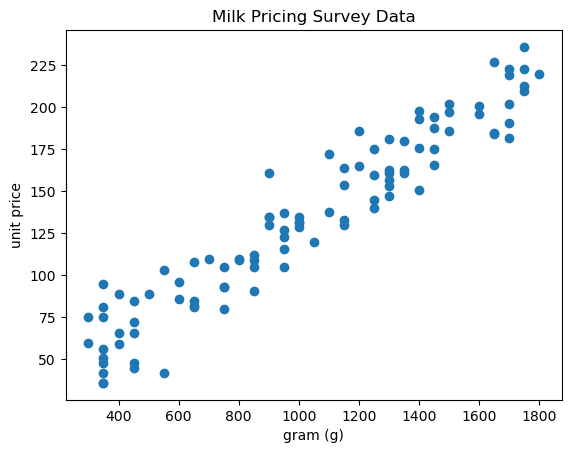

In [4]:
plt.figure()
plt.scatter(df['gram'],df['price'])
plt.xlabel('gram (g)')
plt.ylabel('unit price')
plt.title('Milk Pricing Survey Data')

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

lm = LinearRegression()
X = df[['gram']]
y = df[['price']]

lm.fit(X,y) #fit model
y_predict = lm.predict(X)#get model prediction of observation
r2 = r2_score(y_predict,y)
print("R2 score:",r2)
price_model = "p(g) = %.3fg + %.3f"%(lm.coef_[0],lm.intercept_)
print(price_model)

R2 score: 0.9048273980431976
p(g) = 0.111g + 19.861


1500.0


C:\Users\yvesm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


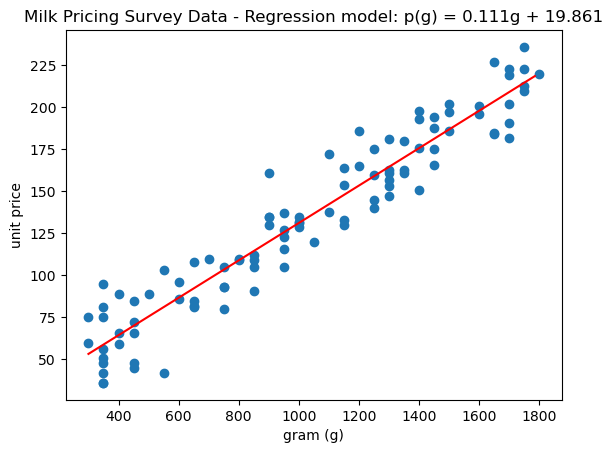

In [20]:
x_min = X.min()[0]
x_max = X.max()[0]
r_x = x_max-x_min
print(r_x)
x_n = np.arange(x_min,x_max,step=r_x/100)
y_n = lm.predict(x_n.reshape(-1,1))

plt.figure()
plt.scatter(df['gram'],df['price'])
plt.plot(x_n,y_n,color="red")
plt.xlabel('gram (g)')
plt.ylabel('unit price')
plt.title('Milk Pricing Survey Data - Regression model: %s'%(price_model))
plt.show()